<a href="https://colab.research.google.com/github/ImbangJayoGampito/DIF62130_B_25_2311532002/blob/main/Praktikum%201/SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Persiapan data
Data dipersiapkan dengan menggunakan library pandas.

Supaya dapat menggunakan pandas dan menggunakannya di model pembelajaran mesin, buat contoh dataset dengan satu fitur dan satu label.

Fitur dari dataset adalah "luas" dan dapat disebut sebagai nilai x karena tidak bergantung harga apapun.

Target (yang dicari) dataset merupakan "harga".

In [ ]:
import pandas as pd
data = {'luas' : [6,8,10,14,18],
        'harga': [7,9,13, 17.5,18]
        }
df = pd.DataFrame(data)
df

,luas,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


#2. Explorasi Data
##a. Scatter Plot
Menggunakan scatter plot untuk mengetahui hubungan luas sebagai x dan harga sebagai y. Plot tersebut dibatasi dari 0 sampai dengan 25 dan juga ditambahkan grid

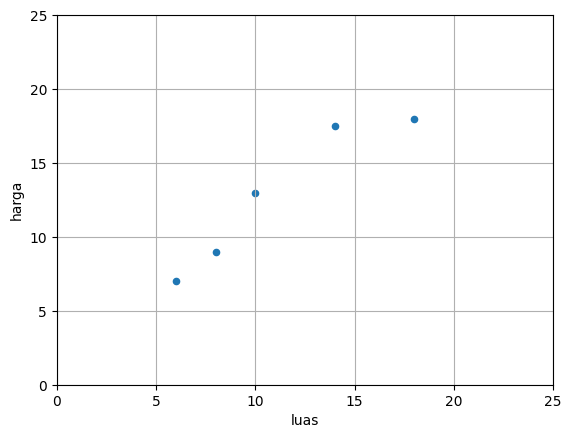

In [ ]:
import matplotlib.pyplot as plt
df.plot(kind='scatter', x='luas', y='harga')
plt.xlabel('luas')
plt.ylabel('harga')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

##b. Cetak Langsung
Harga dari dataset bisa dicetak secara langsung melalui fungsi print()

In [ ]:
import numpy as np
x = df['luas'].values
y = df['harga'].values
print(f"x: {x}")
print(f"y: {y}")

x: [ 6  8 10 14 18]
y: [ 7.   9.  13.  17.5 18. ]


#3. Preprocessing
Array akan diubah terlebih dahulu ke dalam bentuk matriks supaya dapat dipahami oleh model LinearRegression yang akan digunakan. Ubah array menjadi matriks 2 dimensi yang memiliki satu kolom.

In [ ]:
x = x.reshape(-1,1)

print(f"x: {x}")


x: [[ 6]
 [ 8]
 [10]
 [14]
 [18]]


#4. Pelatihan Model
Latih model dengan input berupa fitur x dan output yang berupa label y.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

#5. Prediksi Model
Buat 2 titik data dan ubah menjadi bentuk matriks sehingga terdapat prediksi harga y dengan input x.

In [ ]:
x_vis = np.linspace(0, 20, 2).reshape(-1, 1)
print(x_vis)  # 100 points from 0 to 6
y_vis = model.predict(x_vis)

[[ 0.]
 [20.]]


Visualisasikan garis linear yang diperoleh dari hasil prediksi bersamaan harga pada dataset yang sudah ada.

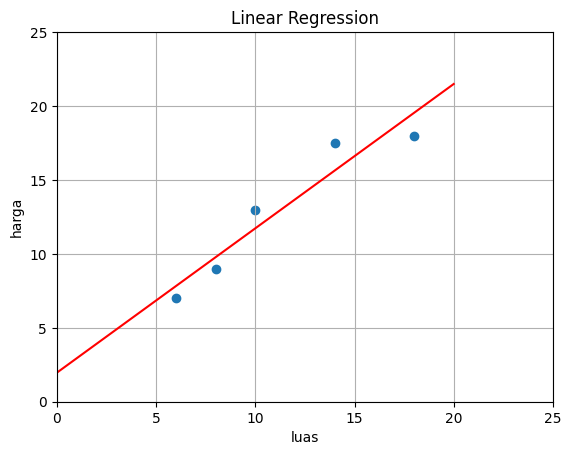

In [ ]:
plt.scatter(x,y)
plt.plot(x_vis, y_vis, color='red', label='Regression Line')
plt.xlabel('luas')
plt.ylabel('harga')
plt.title('Linear Regression')
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

Pada regresi linear, terdapat dua elemen sebagai perhitungannya.

Intercept -> jarak dari garis linear dari nol

Slope -> Harga gradien yang bergantung dengan harga "x". Pada x yang berjumlah banyak maka diperhitungkan dari x1w1 + x2w2 + .... + xnwn di mana n adalah jumlah fitur yang ada.

In [ ]:
print(f"interfept: {model.intercept_}")
print(f"slope: {model.coef_[0]}")

interfept: 1.965517241379315
slope: 0.9762931034482755


#6. Evaluasi Model
##a. Prediksi Harga
Supaya model dapat memprediksi harga, masukkan harga x berupa luas untuk harga independen untuk mencari harga dependen y.

In [ ]:
luas_tanah = np.array([12, 15, 20]).reshape(-1,1)
luas_tanah

array([[12],
       [15],
       [20]])

predict(x : array) digunakan untuk memetakan input ke output dengan harga intercept dan slope.

In [ ]:
harga_prediksi = model.predict(luas_tanah)
harga_prediksi

array([13.68103448, 16.60991379, 21.49137931])

Hasil pemetaan prediksi harga dari luas tanah.

In [ ]:
for luas, hrg in zip(luas_tanah, harga_prediksi):
  print(f"luas: {luas[0]} -> harga: {hrg}")

luas: 12 -> harga: 13.681034482758621
luas: 15 -> harga: 16.609913793103445
luas: 20 -> harga: 21.491379310344826


##b. Penggunaan Metrik Penilaian
Metrik yang digunakan adalah Mean Squared Error (MSE)

Mean Squared Error adalah metriks penilaian untuk melihat seberapa jauh jumlah perkiraan seluruh harga sebenarnya dari harga prediksi. MSE dapat ditulis dengan persamaan di bawah:

$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

Keterangan:

MSE = Mean Squared Error (semakin rendah harganya maka semakin akurat prediksi model)

n = Jumlah harga yang perlu diprediksi

$y_i$ = Harga y sebenarnya dari 1 sampai n

$\hat{y}_i$ = Harga y yang diprediksi dari model

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(luas_tanah, harga_prediksi)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.5473038669242913


#7. Contoh Lain
Terdapat harga latihan (x/y train) untuk melatih model dan harga pengujian (x_y test) yang digunakan untuk pengujian akurasi model.


In [ ]:
x_train = np.array([6, 8, 10, 14, 18]).reshape(-1,1)
y_train = np.array([7, 9, 13, 17.5, 18])
x_test = np.array([9, 9, 11, 16, 12]).reshape(-1,1)
y_test = np.array([11, 8.5, 15, 18, 11])

Model yang digunakan untuk prediksi adalah regresi linear.

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Model tersebut akan diuji dengan memberikannya x_test dengan luaran y_predict (harga yang diprediksi model). Setelah itu dilakukan pengujian dengan menggunakan $R^2$. $R^2$ digunakan untuk melihat proporsi variabel dependen yang dapat dijelaskan oleh variabel independen. Harga $R^2$ terdiri dari 0 sampai dengan 1 dengan semakin tinggi harganya maka semakin cocok data-data yang diuji muat dengan model ketimbang garis rata-rata.

$R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}$

$\text{SS}_{\text{res}}$ menyatakan selisih antara harga sebenarnya dan harga prediksi yang dihasilkan oleh model. Secara rumus, $\text{SS}_{\text{res}}$ dinyatakan sebagai.

$\text{SS}_{\text{res}} = \sum_{i=1}^{n} (y_i - \hat{y_i})^2$

$\text{SS}_{\text{tot}}$ menyatakan hubungan garis dengan rata-rata keseluruhan harga. $\text{SS}_{\text{tot}}$ dapat dihitung dengan

$\text{SS}_{\text{tot}} = \sum_{i=1}^{n} (y_i - \bar{y})^2$

Sehingga, $R^2$ juga dapat dinyatakan sebagai

$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$

In [ ]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

R2 Score: 0.6873061136400747
